<a href="https://colab.research.google.com/github/taniaarsya/Ecorish-C22-PS142/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download and Extract the data into drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import dataset from drive

import zipfile
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Machine Learning-new/Dataset/fruits.zip')
zip_file.extractall('/tmp/')

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
img_height, img_width = 100, 100
batch_size = 100

train_data = tf.keras.utils.image_dataset_from_directory('/tmp/fruits/train',
                                                 image_size = (img_height, img_width),
                                                 batch_size = batch_size)

val_data = tf.keras.utils.image_dataset_from_directory('/tmp/fruits/validation',
                                                 image_size = (img_height, img_width),
                                                 batch_size = batch_size) 
test_data = tf.keras.utils.image_dataset_from_directory('/tmp/fruits/test',
                                                 image_size = (img_height, img_width),
                                                 batch_size = batch_size)
                                                                  

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


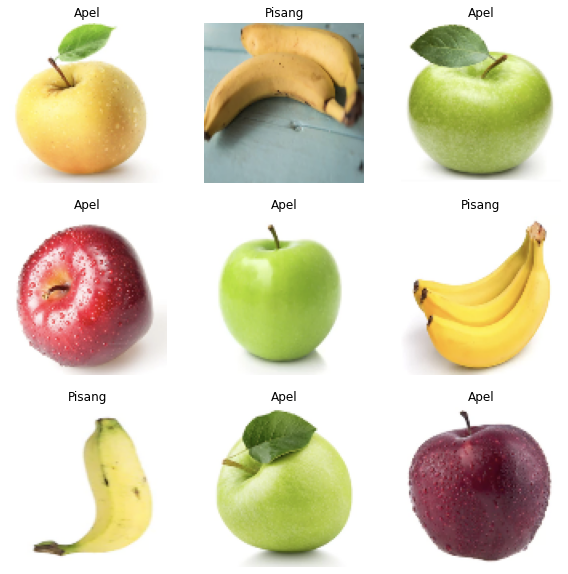

In [6]:
class_names = ["Apel", "Pisang", "Jeruk"]
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model():

 model = Sequential([
      #tf.keras.layers.Rescaling(1./255),  
      Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
      MaxPooling2D(2, 2),
      Conv2D(32, (3, 3), activation='relu'),
      MaxPooling2D(3, 3),
      Flatten(), 
      Dense(128, activation='relu'), 
      Dense(131, activation='softmax')  
  ])

 model.compile(optimizer="adam",
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

 return model



In [8]:
# Define a Callback class that stops training once accuracy reaches 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
   if(logs.get('accuracy')>0.95) and (logs.get('val_accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [10]:
model = create_model()

callbacks=myCallback()
history = model.fit(train_data,
    validation_data = val_data,
    epochs = 25,
    verbose=1,
    callbacks=callbacks)


Epoch 1/25
5/5 [==============================] - 2s 98ms/step - loss: 102.9307 - accuracy: 0.2826 - val_loss: 28.8743 - val_accuracy: 0.5152
Epoch 2/25
5/5 [==============================] - 2s 72ms/step - loss: 18.5453 - accuracy: 0.4522 - val_loss: 1.8227 - val_accuracy: 0.6667
Epoch 3/25
5/5 [==============================] - 2s 73ms/step - loss: 2.1550 - accuracy: 0.7913 - val_loss: 3.8445 - val_accuracy: 0.7273
Epoch 4/25
5/5 [==============================] - 2s 74ms/step - loss: 1.6246 - accuracy: 0.7978 - val_loss: 1.1764 - val_accuracy: 0.7576
Epoch 5/25
5/5 [==============================] - 2s 73ms/step - loss: 0.7702 - accuracy: 0.7543 - val_loss: 1.4633 - val_accuracy: 0.6970
Epoch 6/25
5/5 [==============================] - 2s 73ms/step - loss: 0.5334 - accuracy: 0.8261 - val_loss: 0.6123 - val_accuracy: 0.8333
Epoch 7/25
5/5 [==============================] - 2s 76ms/step - loss: 0.2119 - accuracy: 0.9152 - val_loss: 0.6272 - val_accuracy: 0.8636
Epoch 8/25
5/5 [=======

In [11]:
score = model.evaluate(test_data,)
print('Test Accuracy :',score[1])

2/2 [==============================] - 0s 70ms/step - loss: 0.3322 - accuracy: 0.9231
Test Accuracy : 0.9230769276618958


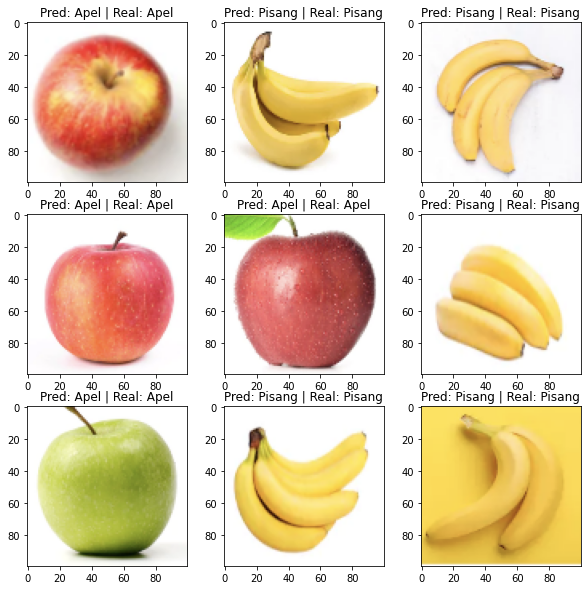

In [13]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_data.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

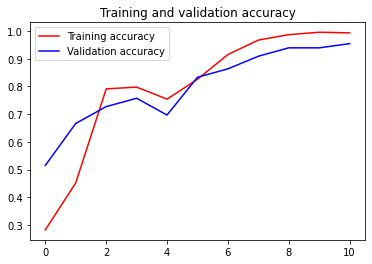

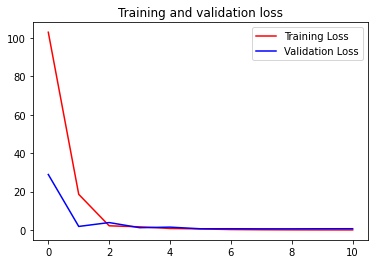

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Capstone Project/ML-NEW/plot_accuracy.jpg")
plt.show()

print("")

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Capstone Project/ML-NEW/plot_loss.jpg")
plt.show()

In [15]:
import pickle
from google.colab import files

with open('/content/drive/MyDrive/Capstone Project/ML-NEW/history.pkl', 'wb') as f:
  pickle.dump(history.history, f)

In [16]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Capstone Project/ML-NEW/My_Model')
model.save('/content/drive/MyDrive/Capstone Project/ML-NEW/My_Model.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project/ML-NEW/My_Model/assets


In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Capstone Project/ML-NEW/My_Model') 
tflite_model = converter.convert()

with open('/content/drive/MyDrive/Capstone Project/ML-NEW/My_Model.tflite', 'wb') as f:
  f.write(tflite_model)

In [18]:
import tensorflow as tf

check_model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/ML-NEW/My_Model')
check_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [19]:
import tensorflow as tf

check_model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone Project/ML-NEW/My_Model.h5')
check_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Saving Screen Shot 2018-06-12 at 9.38.04 PM.png to Screen Shot 2018-06-12 at 9.38.04 PM.png
Pisang 0.9999999


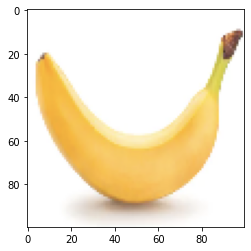

In [20]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100,3))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  y = model.predict(x)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=100)  
  print( class_names[np.argmax(y)], np.max(y) )
  
  